In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud

%matplotlib inline

In [2]:
resenha = pd.read_csv('../dados/imdb-reviews-pt-br.csv')
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
classificacao = resenha['sentiment'].replace(['neg', 'pos'], [0,1])
resenha['classificacao'] = classificacao
resenha

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [4]:


def classificar_texto(texto, coluna_texto, coluna_classificacao):
    
    vetorizador = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizador.fit_transform(texto[coluna_texto])

    treino_x, teste_x, treino_y, teste_y = train_test_split(bag_of_words,
                                                           resenha[coluna_classificacao],
                                                           random_state = 42)

    regressao_logistica = LogisticRegression(random_state=42)
    regressao_logistica.fit(treino_x, treino_y)
    return regressao_logistica.score(teste_x, teste_y)

print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


In [5]:
def join_palavras(resenhas, coluna_texto) :
    return ' '.join([texto for texto in resenhas[coluna_texto]])

In [34]:
def wordcloud_neg(resenhas, coluna_texto) :   
    resenhas_negativas = resenhas.query("sentiment == 'neg'")
    
    todas_palavras = join_palavras(resenhas_negativas, coluna_texto)

    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110,
                               collocations=False).generate(todas_palavras)

    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show

In [35]:
def wordcloud_pos(resenhas, coluna_texto) :   
    resenhas_positivas = resenhas.query("sentiment == 'pos'")

    todas_palavras = join_palavras(resenhas_positivas, coluna_texto)

    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110,
                               collocations=False).generate(todas_palavras)

    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show

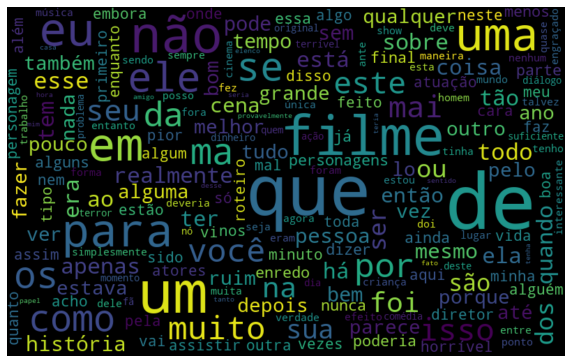

In [8]:
wordcloud_neg(resenha, "text_pt")



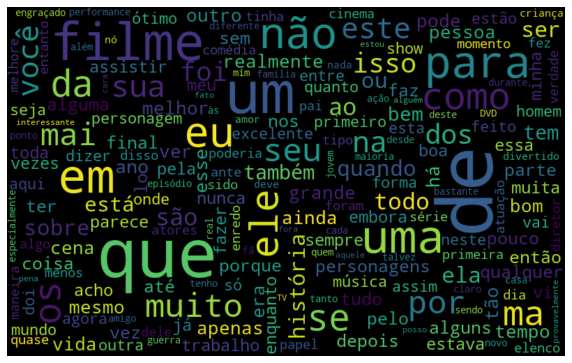

In [9]:
wordcloud_pos(resenha, "text_pt")

In [10]:
token_espaco = nltk.tokenize.WhitespaceTokenizer()
token_resenha = token_espaco.tokenize(join_palavras(resenha, "text_pt"))
frequencia = nltk.FreqDist(token_resenha)
frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [11]:
df_frequencia = pd.DataFrame({"palavra": list(frequencia.keys()),
                            "frequencia": list(frequencia.values())})
df_frequencia.head()

,palavra,frequencia
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741


In [12]:
df_frequencia.nlargest(columns = 'frequencia', n = 10)

,palavra,frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


In [13]:
import seaborn as sns

def pareto(resenha, coluna_texto, quantidade):
    
    token_espaco = nltk.tokenize.WhitespaceTokenizer()
    token_resenha = token_espaco.tokenize(join_palavras(resenha, coluna_texto))
    frequencia = nltk.FreqDist(token_resenha)
    
    df_frequencia = pd.DataFrame({"palavra": list(frequencia.keys()),
                            "frequencia": list(frequencia.values())})
    
    df_frequencia = df_frequencia.nlargest(columns = 'frequencia', n = quantidade)
    
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data=df_frequencia, x='palavra', y='frequencia', color='gray')
    ax.set(ylabel = 'contagem')
    plt.show

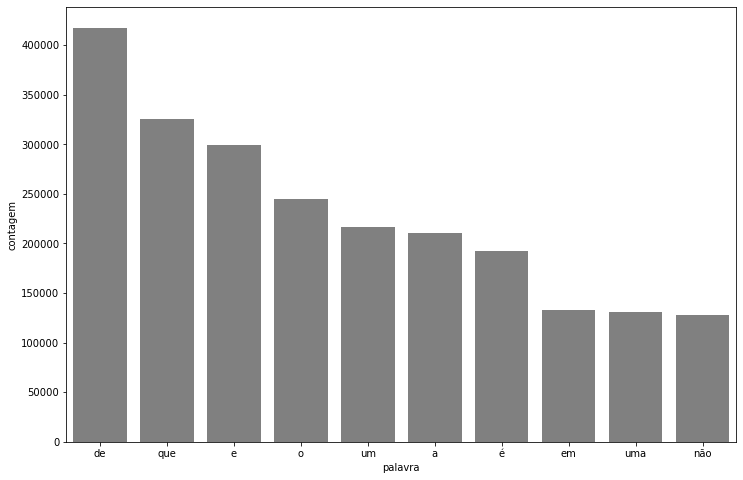

In [14]:
pareto(resenha, "text_pt", 10)

In [15]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase= list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha['tratamento_1'] = frase_processada
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [16]:
classificar_texto(resenha, "tratamento_1", "classificacao")

0.6607359482410028

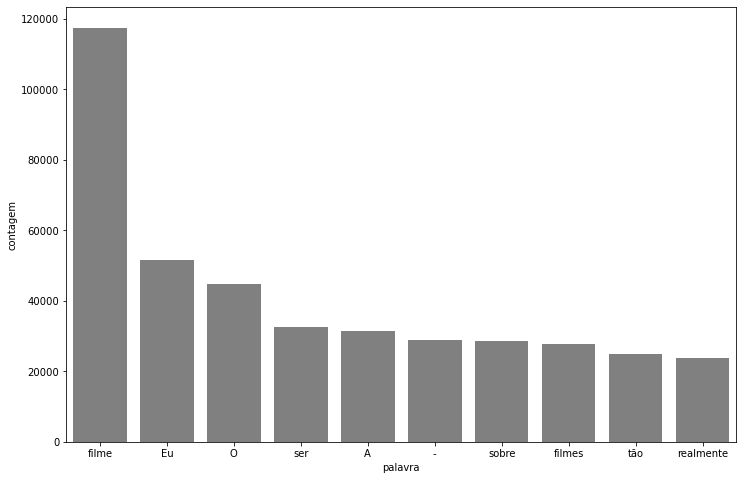

In [17]:
pareto(resenha, "tratamento_1", 10)

In [18]:
from string import punctuation

token_pontuacao = nltk.tokenize.WordPunctTokenizer()

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)
    
pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()

for opiniao in resenha['tratamento_1']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha['tratamento_2'] = frase_processada

In [19]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


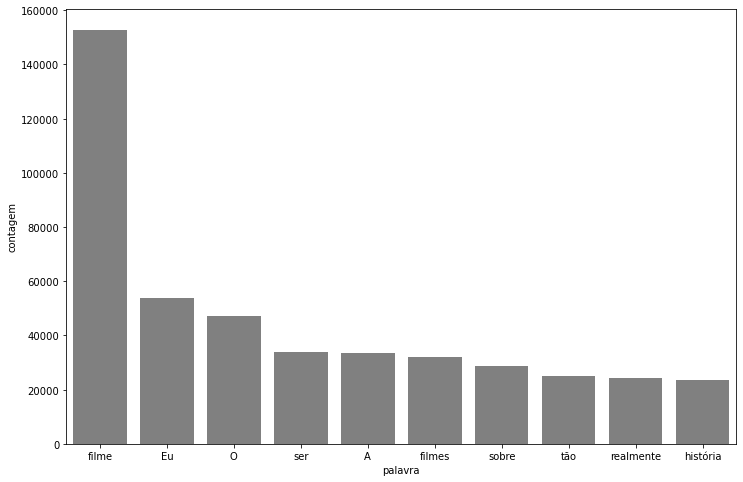

In [20]:
pareto(resenha, "tratamento_2", 10)

In [21]:
import unidecode

sem_acentos = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]

In [22]:
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [23]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [27]:
resenha["tratamento_3"] = sem_acentos

frase_processada = list()

for opiniao in resenha['tratamento_3']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha['tratamento_3'] = frase_processada



In [33]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [30]:
acuracia_tratamento_3 = classificar_texto(resenha, "tratamento_3", "classificacao")
acuracia_tratamento_3

0.6810351799433886

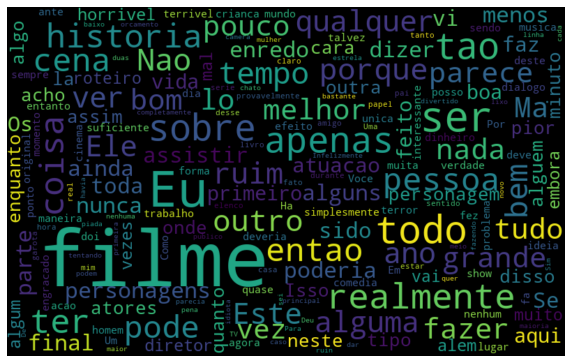

In [36]:
wordcloud_neg(resenha, "tratamento_3")

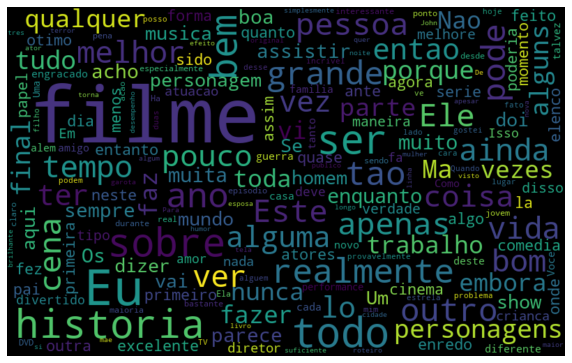

In [37]:
wordcloud_pos(resenha, "tratamento_3")

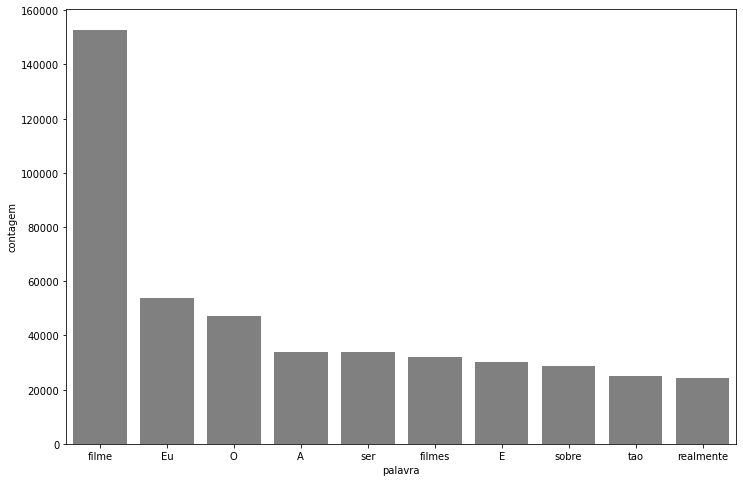

In [38]:
pareto(resenha, "tratamento_3", 10)

In [39]:
frase_processada = list()

for opiniao in resenha['tratamento_3']:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha['tratamento_4'] = frase_processada

In [40]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...


In [42]:
acuracia_tratamento4 = classificar_texto(resenha, "tratamento_4", "classificacao")
acuracia_tratamento4

0.6879094217549535

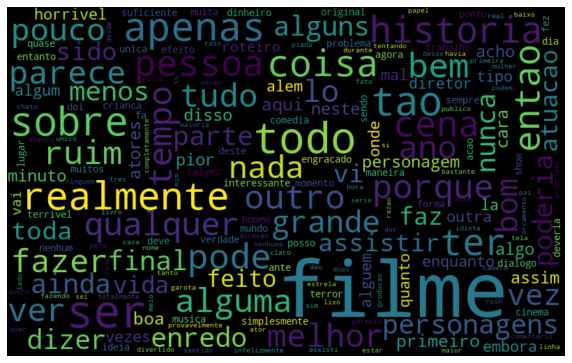

In [44]:
wordcloud_neg(resenha, "tratamento_4")

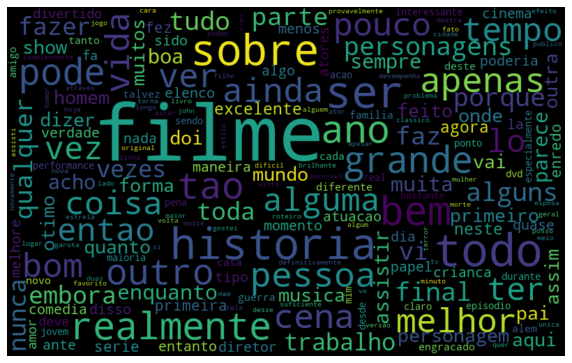

In [45]:
wordcloud_pos(resenha, "tratamento_4")

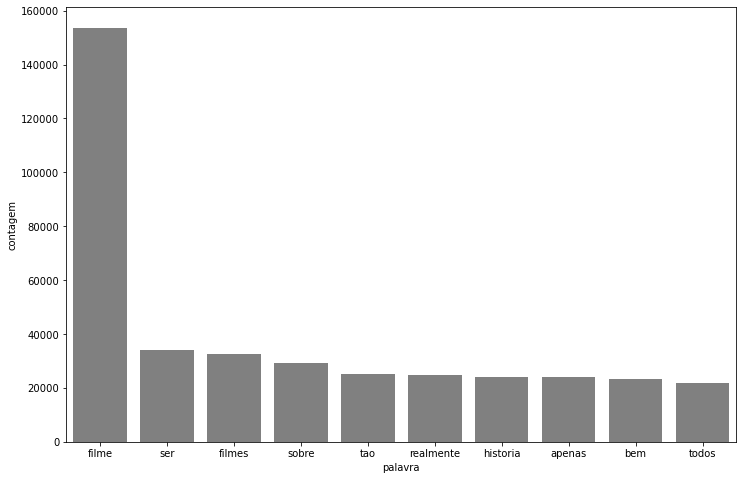

In [46]:
pareto(resenha, "tratamento_4", 10)

In [49]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /home/rocha/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [50]:
stemmer = nltk.RSLPStemmer()

frase_processada = list()

for opiniao in resenha['tratamento_4']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))
    
resenha['tratamento_5'] = frase_processada

In [51]:
acuracia_tratamento5 = classificar_texto(resenha, "tratamento_5", "classificacao")
print(acuracia_tratamento5)
print(acuracia_tratamento4)

0.6943792964011323
0.6879094217549535


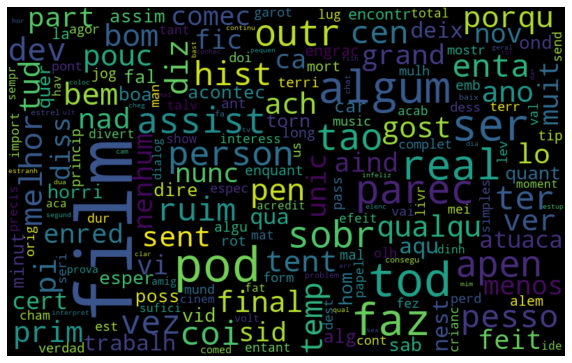

In [52]:
wordcloud_neg(resenha, "tratamento_5")

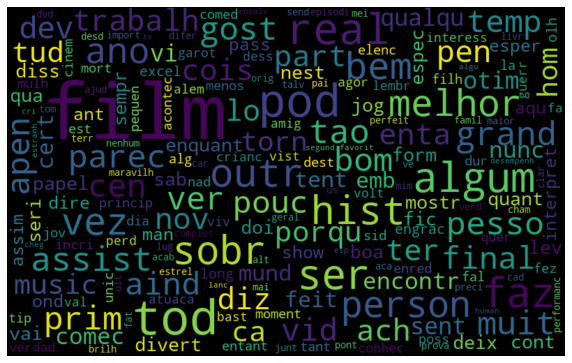

In [53]:
wordcloud_pos(resenha, "tratamento_5")

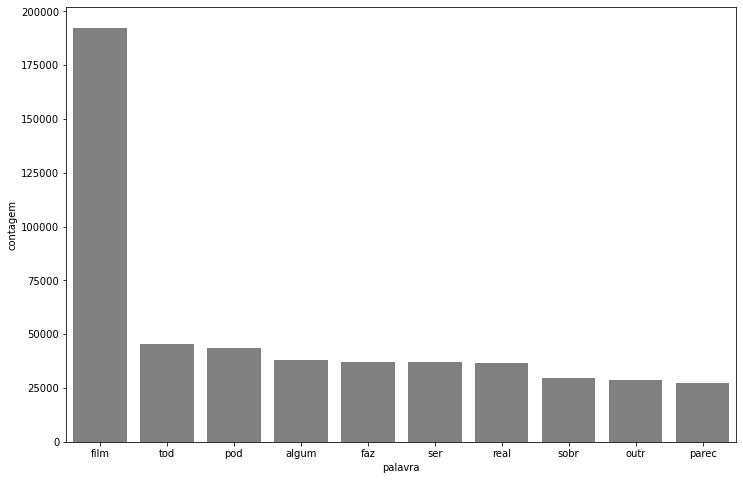

In [54]:
pareto(resenha, "tratamento_5", 10)

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase = False, max_features=50)

tfidf_tratamento5 = tfidf.fit_transform(resenha["tratamento_5"])

treino_x, teste_x, treino_y, teste_y = train_test_split(tfidf_tratamento5, 
                                                        resenha["classificacao"],
                                                       random_state = 42)
regressao_logistica = LogisticRegression(random_state=42)
regressao_logistica.fit(treino_x, treino_y)
acuracia_tfidf_tratamento5 = regressao_logistica.score(teste_x, teste_y)
acuracia_tfidf_tratamento5

0.6988273352203801

In [ ]:
from nltk import ngrams

In [61]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])
treino_x, teste_x, treino_y, teste_y = train_test_split(vetor_tfidf, 
                                                        resenha["classificacao"],
                                                       random_state = 42)
regressao_logistica.fit(treino_x, treino_y)
acuracia_tfidf_ngrams = regressao_logistica.score(teste_x, teste_y)
acuracia_tfidf_ngrams

0.8858875859280226